# Downloading The Dataset

In [ ]:
# Install kaggle
!pip install -q kaggle

In [ ]:
# We need to upload the kaggle.json file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sikirulahi","key":"1aaef871b18500ea8fd27ed412e40f93"}'}

In [ ]:
# Create a kaggle directory
! mkdir ~/.kaggle

In [ ]:
# Copy the kaggle.json to folder created

! cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# To list all datasets in kaggle

! kaggle datasets list

ref                                                               title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                   Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38          10223        341  1.0              
joebeachcapital/life-longevity-factors                            Life Longevity Factors                               8KB  2023-08-23 01:01:55            826         37  1.0              
nelgiriyewithana/top-spotify-songs-2023                           Most Streamed Spotify Songs 2023                    47KB  2023-08-26 11:04:57            801         38  1.0              
scarfsman/uk-population-data-200120112021              

In [ ]:
!kaggle datasets list -s imsparsh/flowers-dataset

ref                       title             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------  ---------------  -----  -------------------  -------------  ---------  ---------------  
imsparsh/flowers-dataset  Flowers Dataset  205MB  2021-02-19 21:41:06           3721         42  0.9411765        


In [ ]:
!kaggle datasets download -d imsparsh/flowers-dataset

 99% 204M/205M [00:07<00:00, 29.7MB/s]
100% 205M/205M [00:07<00:00, 28.0MB/s]


In [ ]:
# Next thing we need to do is to unzip the training zip file

!unzip flowers-dataset.zip

# Now uploading the dataset

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = "/content/flowers-dataset"

In [3]:
train_path = "/content/drive/MyDrive/Projects/Flower_classification/Dataset/train"
test_path = "/content/drive/MyDrive/Projects/Flower_classification/Dataset/test"
train_daisy_path = os.path.join(train_path, "daisy")
train_dandelion_path = os.path.join(train_path, "dandelion")
train_rose_path = os.path.join(train_path, "rose")
train_sunflower_path = os.path.join(train_path, "sunflower")
train_tulip_path = os.path.join(train_path, "tulip")

print(train_path)
print(test_path)
print(train_daisy_path)
print(train_dandelion_path)
print(train_rose_path)
print(train_sunflower_path)
print(train_tulip_path)
print(test_path)

/content/drive/MyDrive/Projects/Flower_classification/Dataset/train
/content/drive/MyDrive/Projects/Flower_classification/Dataset/test
/content/drive/MyDrive/Projects/Flower_classification/Dataset/train/daisy
/content/drive/MyDrive/Projects/Flower_classification/Dataset/train/dandelion
/content/drive/MyDrive/Projects/Flower_classification/Dataset/train/rose
/content/drive/MyDrive/Projects/Flower_classification/Dataset/train/sunflower
/content/drive/MyDrive/Projects/Flower_classification/Dataset/train/tulip
/content/drive/MyDrive/Projects/Flower_classification/Dataset/test


# Count the number of classes

In [4]:
num_classes = len(os.listdir(train_path))
total_test = len(os.listdir(test_path))


num_train_daisy = len(os.listdir(train_daisy_path))
num_train_dandelion = len(os.listdir(train_dandelion_path))
num_train_rose = len(os.listdir(train_rose_path))
num_train_sunflower = len(os.listdir(train_sunflower_path))
num_train_tulip = len(os.listdir(train_tulip_path))
total_train = num_train_daisy + num_train_dandelion + num_train_rose + num_train_sunflower + num_train_tulip


print(f" The number of train classes is: {num_classes}")
print("--------------------------------------")

print(f"The number of daisy flower is: {num_train_daisy}")
print(f"The number of dandelion flower is: {num_train_dandelion}")
print(f"The number of rose flower is: {num_train_rose}")
print(f"The number of sunflower is: {num_train_sunflower}")
print(f"The number of tulip flower is: {num_train_tulip}")
print("--------------------------------------")

print(f" The number of test classes is: {total_test}")
print(f"The total training set it: {total_train}")

 The number of train classes is: 5
--------------------------------------
The number of daisy flower is: 501
The number of dandelion flower is: 646
The number of rose flower is: 497
The number of sunflower is: 495
The number of tulip flower is: 607
--------------------------------------
 The number of test classes is: 924
The total training set it: 2746


# Preprocess the data (Using Image data Augmentation)

### Analyzing Normally

In [5]:
INPUT_SHAPE = 150
BATCH_SIZE = 100

In [6]:
def plotImages(image_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20, 20))
  axes = axes.flatten()
  for img, ax in zip(image_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [7]:
image_gen = ImageDataGenerator(rescale = 1./255)

image_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                              directory = train_path,
                                              target_size = (INPUT_SHAPE, INPUT_SHAPE),
                                              shuffle = True,
                                              class_mode = "sparse")

Found 2746 images belonging to 5 classes.


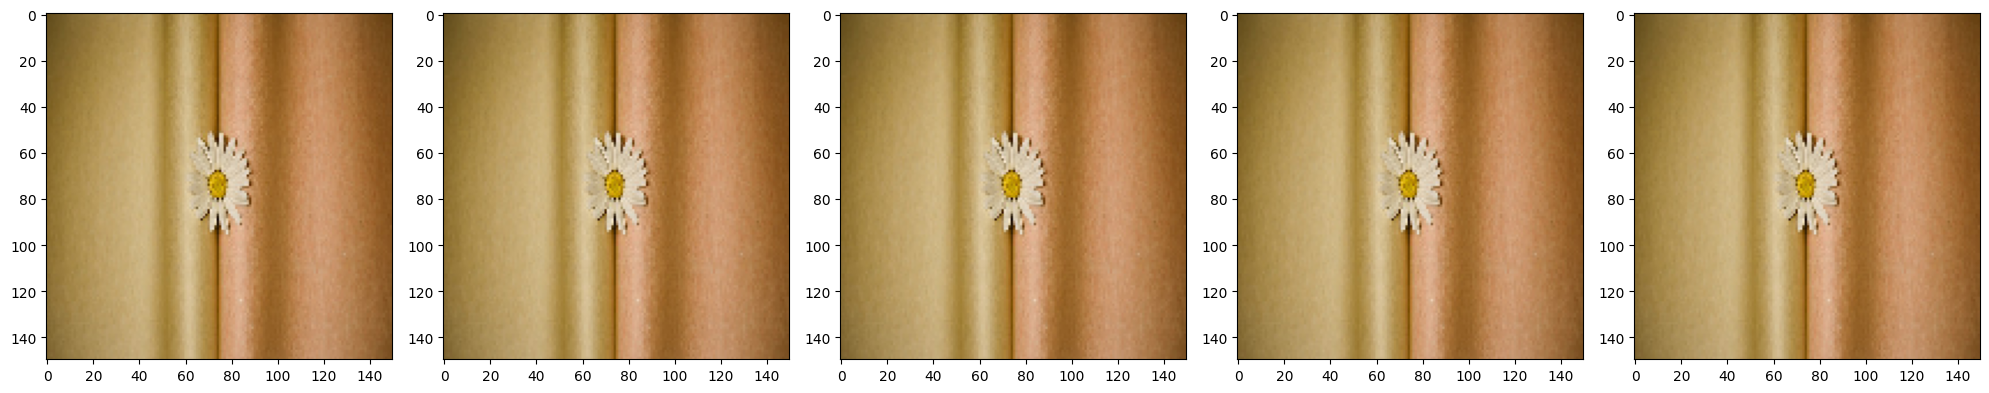

In [8]:
scaled_imag = [image_data_gen[0][0][0] for i in range(5)]

plotImages(scaled_imag)

### Horizontal Flip

In [9]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

image_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               target_size = (INPUT_SHAPE, INPUT_SHAPE),
                                               class_mode = "sparse",
                                               shuffle = True,
                                               directory = train_path)

Found 2746 images belonging to 5 classes.


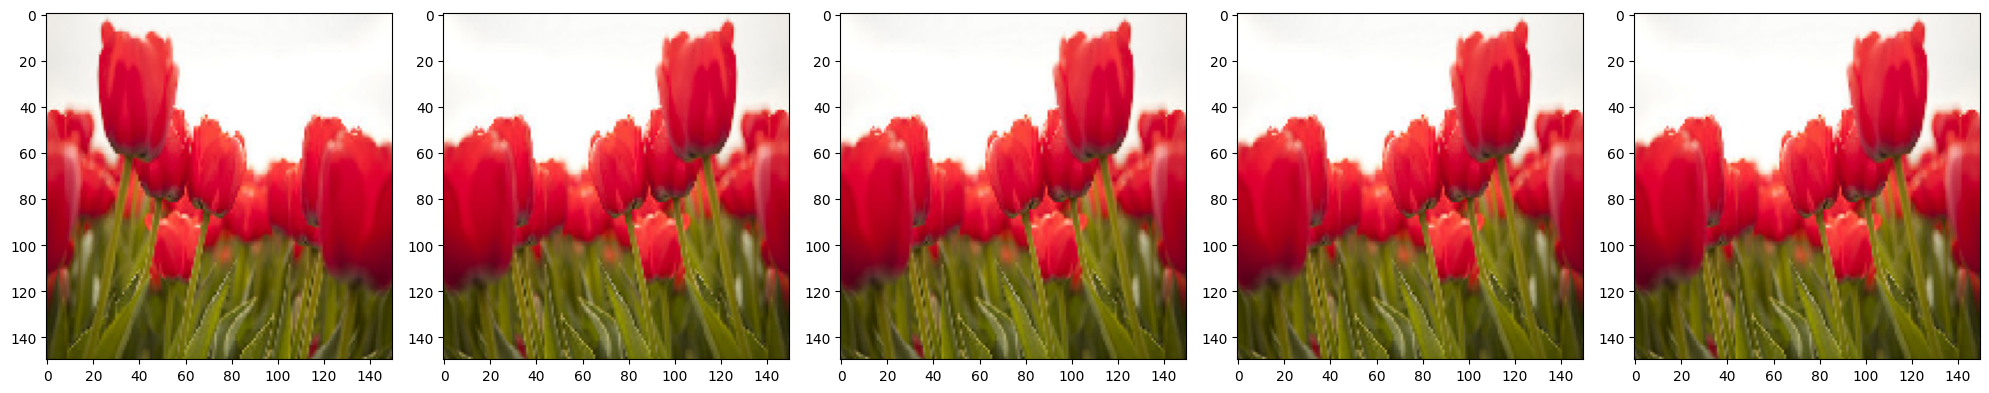

In [10]:
image_horr_flip = [image_data_gen[0][0][0] for i in range(5)]
plotImages(image_horr_flip)

### Apply zoom and vertical flip

In [11]:
image_gen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5,
                               vertical_flip = True)
image_data_gen = image_gen.flow_from_directory(target_size = (INPUT_SHAPE, INPUT_SHAPE),
                                               directory = train_path,
                                               shuffle = True,
                                               class_mode = "sparse",
                                               batch_size = BATCH_SIZE)

Found 2746 images belonging to 5 classes.


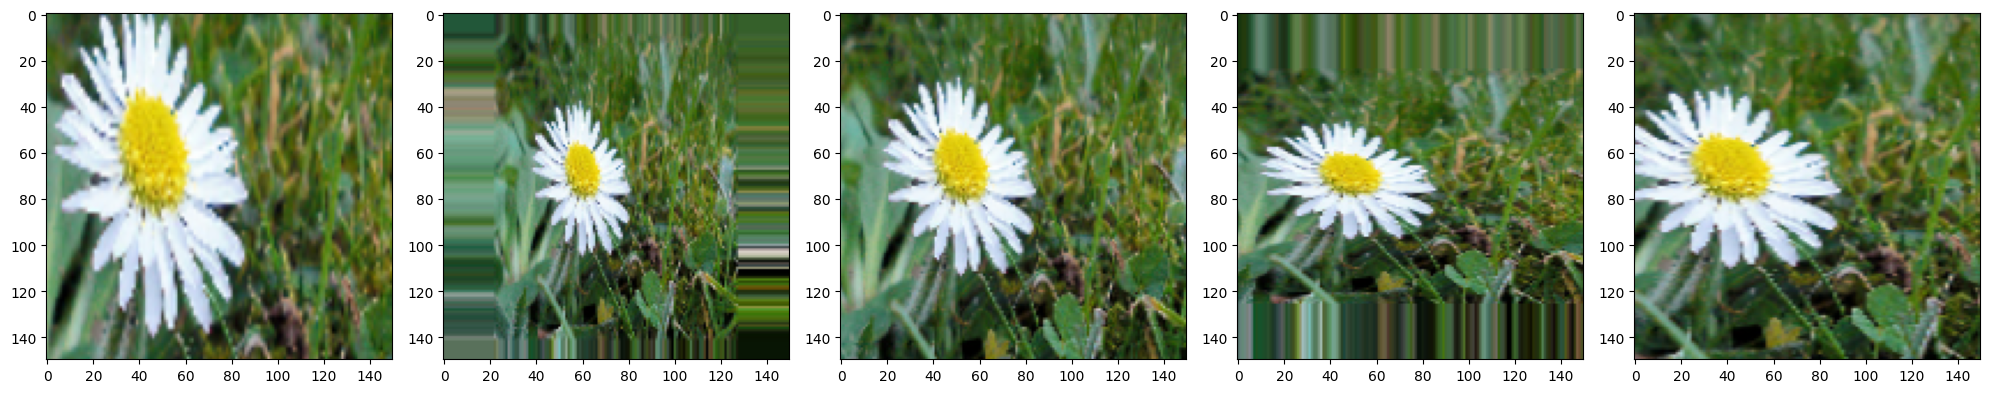

In [12]:
image_horr_flip = [image_data_gen[0][0][0] for i in range(5)]
plotImages(image_horr_flip)

### Apply brightness

In [13]:
image_gen = ImageDataGenerator(rescale = 1./255, brightness_range = (0.3, 0.8))

image_data_gen = image_gen.flow_from_directory(target_size = (INPUT_SHAPE, INPUT_SHAPE),
                                               directory = train_path,
                                               shuffle = True,
                                               class_mode = "sparse",
                                               batch_size = BATCH_SIZE)

Found 2746 images belonging to 5 classes.


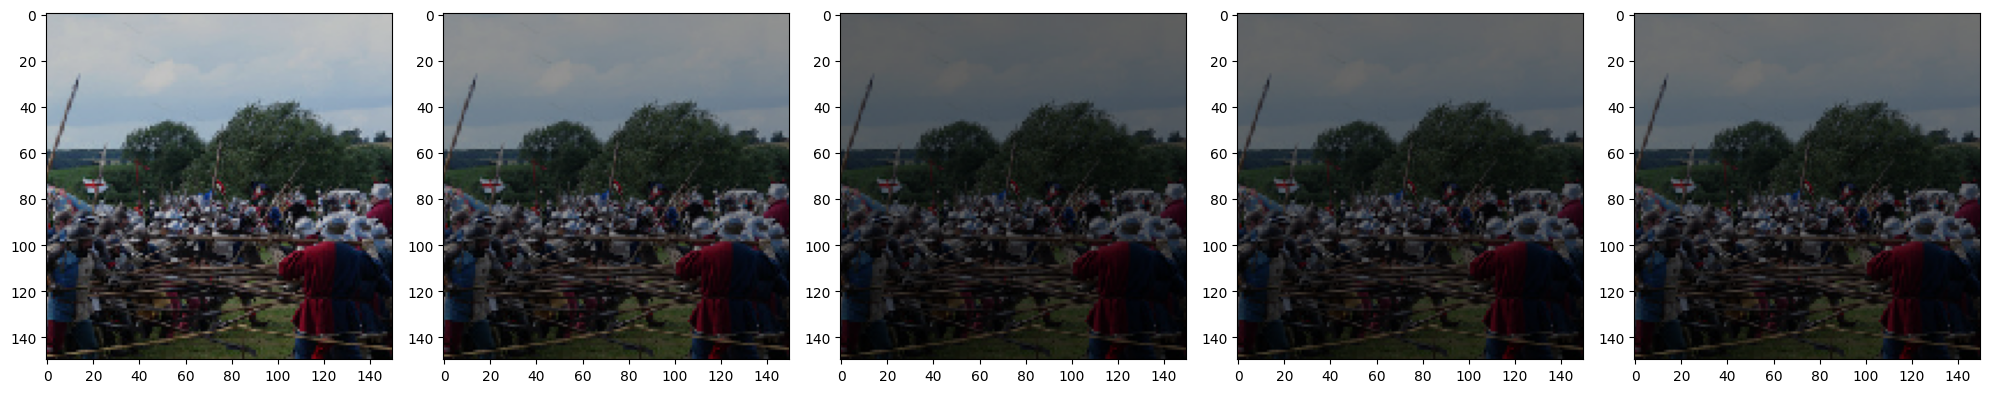

In [14]:
image_bright = [image_data_gen[0][0][0] for i in range(5)]
plotImages(image_bright)

### Wide Shift Range

In [15]:
image_gen = ImageDataGenerator(rescale = 1./255, width_shift_range=0.2,)
image_data_gen = image_gen.flow_from_directory(batch_size= BATCH_SIZE,
                                               directory = train_path,
                                               shuffle = True,
                                               class_mode = 'sparse',
                                               target_size = (INPUT_SHAPE, INPUT_SHAPE))

Found 2746 images belonging to 5 classes.


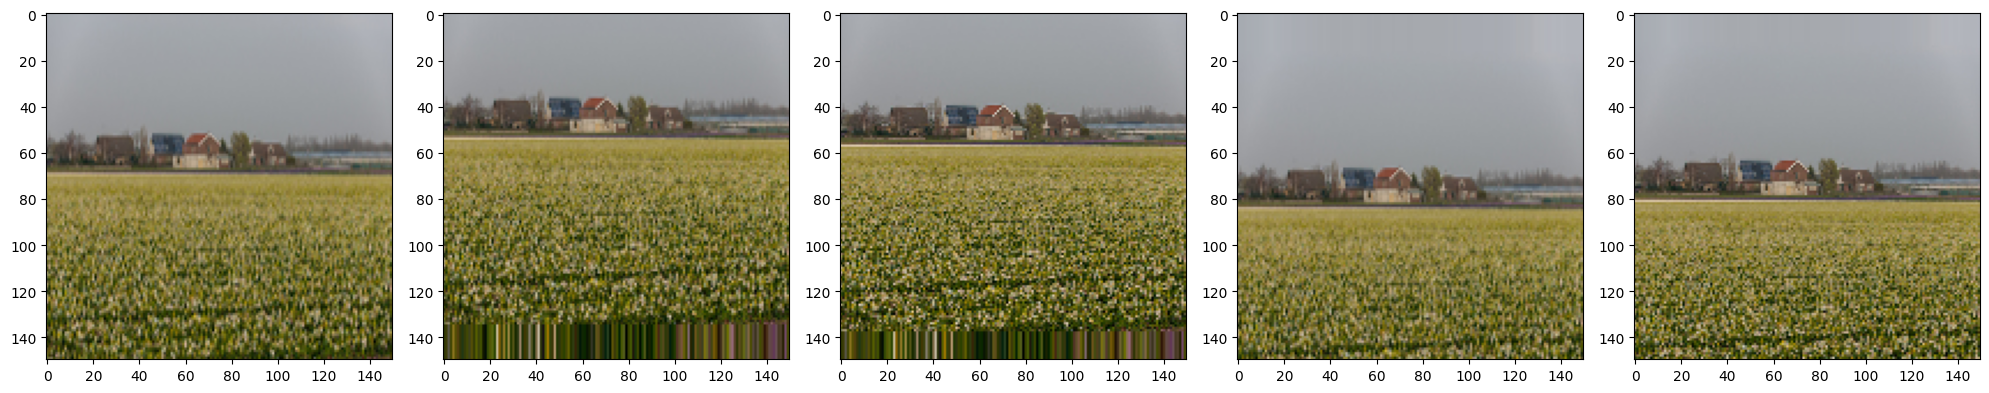

In [16]:
image_norm = [image_data_gen[0][0][0] for i in range(5)]
plotImages(image_norm)

### Now apply the augmentation to train data and scale the test data alone

# First splitting the data into train and validation and apply augentation on the train alone

In [17]:
# image_gen_train = ImageDataGenerator(rescale = 1./255, horizontal_flip= True,
#                                zoom_range = 0.6,  brightness_range = (0.4, 0.8),
#                                vertical_flip = True, rotation_range=40,
#                                 width_shift_range=0.2, height_shift_range=0.2,
#                                 shear_range=0.2, fill_mode='nearest',
#                                 validation_split = 0.2)

# train_image_gen = image_gen_train.flow_from_directory(directory = train_path,
#                                                       batch_size = BATCH_SIZE,
#                                                 class_mode = 'categorical',
#                                                 target_size = (INPUT_SHAPE,INPUT_SHAPE),
#                                                 subset = "training",
#                                                 shuffle = True)

In [18]:
# val_gen_train = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

# val_image_gen = val_gen_train.flow_from_directory(directory = train_path,
#                                                     batch_size = BATCH_SIZE,
#                                                     class_mode = "categorical",
#                                                     subset = "validation",
#                                                     target_size = (INPUT_SHAPE, INPUT_SHAPE) )

In [19]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split= 0.2,
    subset = "training",
    seed = 123,
    batch_size = BATCH_SIZE,
    image_size = (INPUT_SHAPE, INPUT_SHAPE)
)

Found 2746 files belonging to 5 classes.
Using 2197 files for training.


In [20]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split= 0.2,
    subset = "validation",
    seed = 123,
    batch_size = BATCH_SIZE,
    image_size = (INPUT_SHAPE, INPUT_SHAPE)
)

Found 2746 files belonging to 5 classes.
Using 549 files for validation.


In [21]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

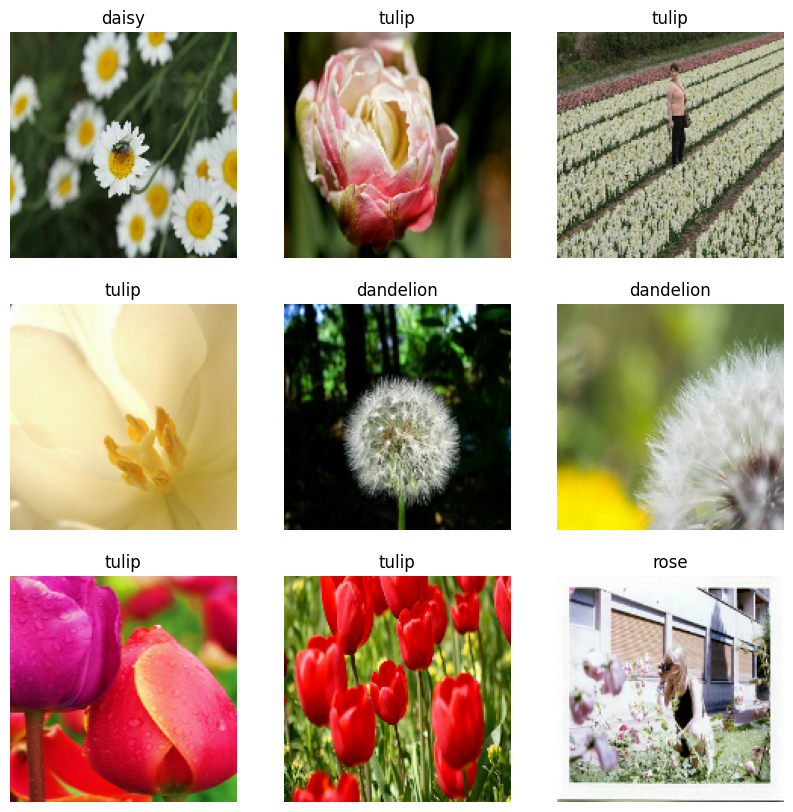

In [22]:
plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

# Use keras preprocessing layers

### Resizing and Rescaling

In [23]:
IMG_SIZE = 150

resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
    tf.keras.layers.Rescaling(1./ 255)
])

### Data augmentation

In [24]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.6),
  # tf.keras.layers.RandomRotation(45),
  # tf.keras.layers.RandomBrightness(factor=0.2)
])

# Create the CNN Network

In [25]:
model = tf.keras.Sequential([
    # Add the preprocessing layers created earlier.
    resizing_and_rescaling,
    data_augmentation,

    tf.keras.layers.Conv2D(32, (3, 3), activation= 'relu', padding = 'same', input_shape = (INPUT_SHAPE, INPUT_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation= 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation= 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')
])


# Compile The Model

In [26]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = 'adam', metrics = ['accuracy'])

In [27]:
# image_gen_train = np.asarray(image_gen_train)
# val_image_gen = np.asarray(val_image_gen)

In [28]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.models import load_model

# val_image_gen = img_to_array(val_image_gen)

In [29]:
EPOCHS = 100
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    validation_data = val_ds)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


22/22 [==============================] - 20s 404ms/step - loss: 1.4872 - accuracy: 0.3455 - val_loss: 1.6741 - val_accuracy: 0.3461
Epoch 2/100
22/22 [==============================] - 8s 283ms/step - loss: 1.2716 - accuracy: 0.4333 - val_loss: 1.1936 - val_accuracy: 0.4627
Epoch 3/100
22/22 [==============================] - 10s 314ms/step - loss: 1.1544 - accuracy: 0.4884 - val_loss: 1.1462 - val_accuracy: 0.5610
Epoch 4/100
22/22 [==============================] - 10s 349ms/step - loss: 1.0719 - accuracy: 0.5635 - val_loss: 1.0520 - val_accuracy: 0.5592
Epoch 5/100
22/22 [==============================] - 9s 328ms/step - loss: 1.0416 - accuracy: 0.5685 - val_loss: 0.9825 - val_accuracy: 0.6011
Epoch 6/100
22/22 [==============================] - 10s 328ms/step - loss: 0.9650 - accuracy: 0.6113 - val_loss: 0.9189 - val_accuracy: 0.6448
Epoch 7/100
22/22 [==============================] - 11s 334ms/step - loss: 0.9209 - accuracy: 0.6313 - val_loss: 0.9437 - val_accuracy: 0.6539
Epoch 

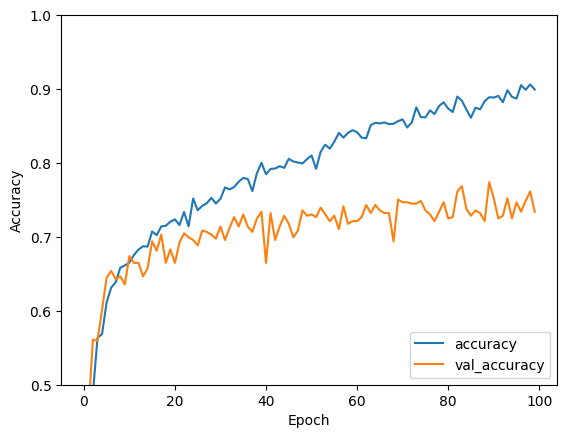

In [30]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

# Applying Early Stopping

In [33]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [39]:
model_2 = tf.keras.Sequential([
    # Add the preprocessing layers created earlier.
    resizing_and_rescaling,
    data_augmentation,

    tf.keras.layers.Conv2D(32, (3, 3), activation= 'relu', padding = 'same', input_shape = (INPUT_SHAPE, INPUT_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation= 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation= 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')
])


In [41]:
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = 'adam', metrics = ['accuracy'])

In [42]:
EPOCHS = 100
history = model_2.fit(
    train_ds,
    epochs = EPOCHS,
    validation_data = val_ds, callbacks=[callback], verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


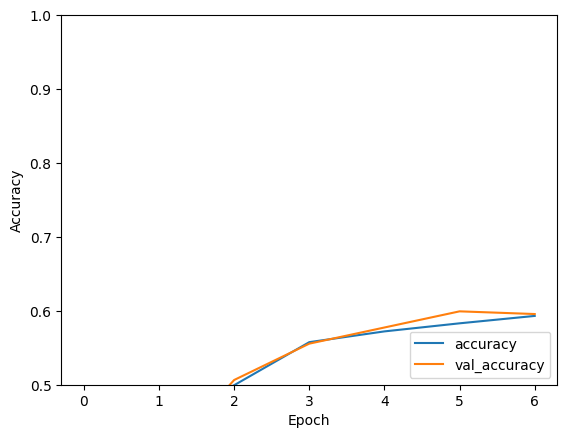

In [43]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')